In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
test_file = pd.read_csv("Data/test.csv")
train_file = pd.read_csv("Data/train.csv")
gendersub_file = pd.read_csv("Data/gender_submission.csv")

In [3]:
train_file.head(10)

#columns:
#passengerid, pclass, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
gendersub_file.head(10)

#we will need to save the passengerid from the train file
#because we are gonna used it to send the submission
passengers_id = test_file['PassengerId']

train_file = train_file.drop(columns = ['PassengerId'])
test_file = test_file.drop(columns = ['PassengerId'])

In [5]:
#checking the survived feature
train_file['Survived'].unique()

array([0, 1])

Text(0.5, 1.0, 'Survived')

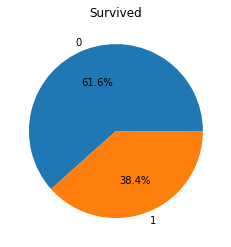

In [6]:
plt.pie(train_file['Survived'].value_counts(), labels=train_file['Survived'].value_counts().index, autopct='%1.1f%%')
plt.title("Survived")

#we can clearly see that most people died

Text(0.5, 1.0, 'Survived by Age')

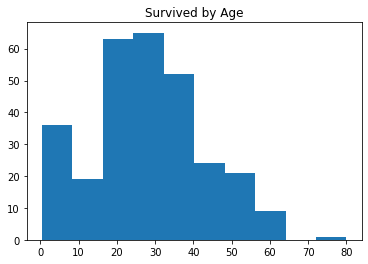

In [7]:
survived = train_file[train_file['Survived'] == 1]

plt.hist(survived['Age'])
plt.title("Survived by Age")
#the most people who survived was between 17~40 years old

In [8]:
#now we are gonna do the same, but using the "Sex" column
#but first we need to transform it in a numerical feature

from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
sex_column_encoded = encoder.fit_transform(train_file['Sex'])

train_file['Sex'] = sex_column_encoded

#test data
encoder_test = preprocessing.LabelEncoder()
sex_column_encoded = encoder_test.fit_transform(test_file['Sex'])

test_file['Sex'] = sex_column_encoded

In [9]:
#1 = male
#2 = female

train_file.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


Text(0.5, 1.0, 'Survived by Sex')

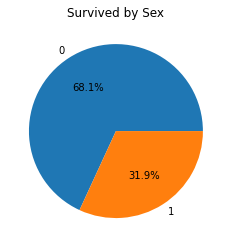

In [10]:
survived = train_file[train_file['Survived'] == 1]

plt.pie(survived['Sex'].value_counts(), labels=survived['Sex'].value_counts().index, autopct='%1.1f%%')
plt.title("Survived by Sex")

#most of the survivors are women

(array([17.,  5., 11., 29., 13.,  9.,  6.,  2.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

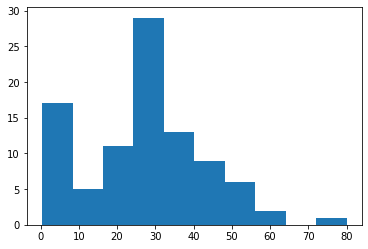

In [11]:
men_survived = survived[survived['Sex'] == 1]
plt.hist(men_survived['Age'])

#the males who most survived were between 27~31 years old

(array([17.,  4., 32., 34., 32., 32., 17., 13.,  9.,  7.]),
 array([ 0.75 ,  6.975, 13.2  , 19.425, 25.65 , 31.875, 38.1  , 44.325,
        50.55 , 56.775, 63.   ]),
 <BarContainer object of 10 artists>)

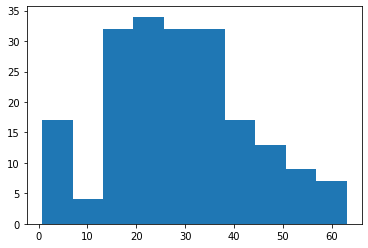

In [12]:
men_survived = survived[survived['Sex'] == 0]
plt.hist(men_survived['Age'])

#the females who most survived were between 13~37 years old

Text(0.5, 1.0, 'Pclass values')

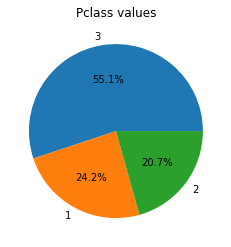

In [13]:
#lets check the pclass

plt.pie(train_file['Pclass'].value_counts(), labels=train_file['Pclass'].value_counts().index, autopct="%1.1f%%")
plt.title("Pclass values")

#we have tree possible values for pclass: 1, 2 and 3

Text(0.5, 1.0, 'Survived by Pclass')

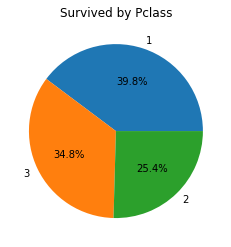

In [14]:
plt.pie(survived['Pclass'].value_counts(), labels=survived['Pclass'].value_counts().index, autopct="%1.1f%%")
plt.title("Survived by Pclass")

#almost 40% of the survivors was from the pclass 1
#and 35% from pclass 3
#so passengers from that class have a bigger chance to survive

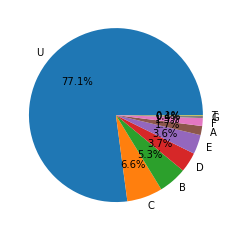

In [15]:
#U for Unknown
train_file['Cabin'].fillna("U", inplace=True)

#we are going to pick only the letter of the cabin
#so we can see how many cabins had (A, B, C, D, E, F, G, U(Unknown cabin))
train_file['Cabin'] = train_file['Cabin'].str[0]

plt.pie(train_file['Cabin'].value_counts(), labels=train_file['Cabin'].value_counts().index, autopct="%1.1f%%")

#test data

test_file['Cabin'].fillna("U", inplace=True)
test_file['Cabin'] = test_file['Cabin'].str[0]

In [16]:
cabin_dummies = pd.get_dummies(train_file['Cabin'], prefix="Cabin")

train_file = pd.concat([train_file, cabin_dummies], axis=1)

#dropping the old unformated 'cabin' column
train_file = train_file.drop(columns=['Cabin'])

#test data
cabin_dummies_test = pd.get_dummies(test_file['Cabin'], prefix="Cabin")

test_file = pd.concat([test_file, cabin_dummies_test], axis=1)

#dropping the old unformated 'cabin' column
test_file = test_file.drop(columns=['Cabin'])

In [17]:
#let's see the ticket column

train_file['Ticket'].value_counts()

#we have almost 700 unique values, so probably it is not worth it use it
#let's drop it
 
train_file = train_file.drop(columns=['Ticket'])
test_file = test_file.drop(columns=['Ticket'])

Text(0.5, 1.0, 'Embarked values')

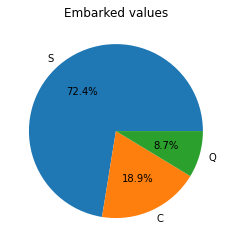

In [18]:
#now let's check the 'embarked' column

plt.pie(train_file['Embarked'].value_counts(), labels=train_file['Embarked'].value_counts().index, autopct="%1.1f%%")
plt.title("Embarked values")

# S = Southampton
# C = Cherbourg
# Q = Queenstown

Text(0.5, 1.0, 'Survived by Embarked')

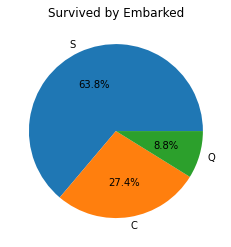

In [19]:
plt.pie(survived['Embarked'].value_counts(), labels=survived['Embarked'].value_counts().index, autopct="%1.1f%%")
plt.title("Survived by Embarked")

#almost 64% of the survivors were from the Embarked S (Southampton)

In [20]:
#let's check the sibsp and parch columns
#sibsp = # of siblings / spouses aboard the Titanic
#parch = # of parents / children aboard the Titanic

train_file[['SibSp', 'Parch']].isnull().sum()

SibSp    0
Parch    0
dtype: int64

(array([[608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.],
        [678., 118.,  80.,   5.,   0.,   4.,   5.,   1.,   0.,   0.]]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 2 BarContainer objects>)

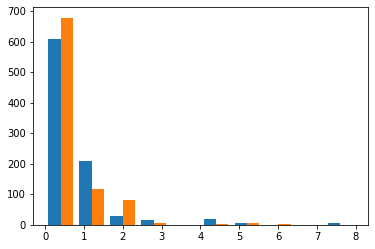

In [21]:
plt.hist(train_file[['SibSp', 'Parch']])

In [22]:
train_file['TotalAboard'] = train_file['SibSp'] + train_file['Parch']
train_file.drop(columns=['SibSp', 'Parch'], inplace=True)

#test data
test_file['TotalAboard'] = test_file['SibSp'] + test_file['Parch']
test_file.drop(columns=['SibSp', 'Parch'], inplace=True)

In [23]:
train_file['isAlone'] = np.where(train_file['TotalAboard'] > 0, 0, 1)
train_file.drop(columns=['TotalAboard'], inplace=True)
train_file.head(10)

#test data
test_file['isAlone'] = np.where(test_file['TotalAboard'] > 0, 0, 1)
test_file.drop(columns=['TotalAboard'], inplace=True)
test_file.head(10)

,Pclass,Name,Sex,Age,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,isAlone
0,3,"Kelly, Mr. James",1,34.5,7.8292,Q,0,0,0,0,0,0,0,1,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,7.0000,S,0,0,0,0,0,0,0,1,0
2,2,"Myles, Mr. Thomas Francis",1,62.0,9.6875,Q,0,0,0,0,0,0,0,1,1
3,3,"Wirz, Mr. Albert",1,27.0,8.6625,S,0,0,0,0,0,0,0,1,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,12.2875,S,0,0,0,0,0,0,0,1,0
5,3,"Svensson, Mr. Johan Cervin",1,14.0,9.2250,S,0,0,0,0,0,0,0,1,1
6,3,"Connolly, Miss. Kate",0,30.0,7.6292,Q,0,0,0,0,0,0,0,1,1
7,2,"Caldwell, Mr. Albert Francis",1,26.0,29.0000,S,0,0,0,0,0,0,0,1,0
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,7.2292,C,0,0,0,0,0,0,0,1,1
9,3,"Davies, Mr. John Samuel",1,21.0,24.1500,S,0,0,0,0,0,0,0,1,0


In [24]:
#let's check the 'fare' columnn

train_file['Fare'].isnull().sum()

0

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

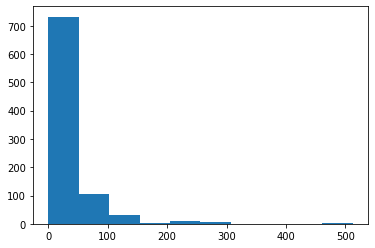

In [25]:
plt.hist(train_file['Fare'])

In [26]:
#normalizing the 'Fare' feature

from sklearn import preprocessing

train_file = train_file[train_file['Fare'] < 400]
scaler = preprocessing.StandardScaler()

fare_normalized = scaler.fit_transform(np.array(train_file['Fare']).reshape(-1, 1))
train_file['Fare'] = fare_normalized

#test data
test_file = test_file[test_file['Fare'] < 400]
scaler_test = preprocessing.StandardScaler()

fare_normalized_test = scaler_test.fit_transform(np.array(test_file['Fare']).reshape(-1, 1))
test_file['Fare'] = fare_normalized_test

In [27]:
train_file.head(10)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,isAlone
0,0,3,"Braund, Mr. Owen Harris",1,22.0,-0.566959,S,0,0,0,0,0,0,0,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,0.989016,C,0,0,1,0,0,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,-0.550557,S,0,0,0,0,0,0,0,0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0.547171,S,0,0,1,0,0,0,0,0,0,0
4,0,3,"Allen, Mr. William Henry",1,35.0,-0.547519,S,0,0,0,0,0,0,0,0,1,1
5,0,3,"Moran, Mr. James",1,NaN,-0.537598,Q,0,0,0,0,0,0,0,0,1,1
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0.517101,S,0,0,0,0,1,0,0,0,0,1
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,-0.231019,S,0,0,0,0,0,0,0,0,1,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,-0.472597,S,0,0,0,0,0,0,0,0,1,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,-0.012426,C,0,0,0,0,0,0,0,0,1,0


In [28]:
#let's check the 'name' column

train_file[['Last_Name', 'First_Name']] = train_file['Name'].str.split(',', expand=True)
train_file.drop(columns=['Last_Name', 'Name'], inplace=True)

train_file.head(10)

#test data
test_file[['Last_Name', 'First_Name']] = test_file['Name'].str.split(',', expand=True)
test_file.drop(columns=['Last_Name', 'Name'], inplace=True)

In [29]:
train_file[['Title', 'Full_Name']] = train_file['First_Name'].str.split('.', 1, expand=True)
train_file.drop(columns=['Full_Name', 'First_Name'], inplace=True)

train_file.head(10)

#test data
test_file[['Title', 'Full_Name']] = test_file['First_Name'].str.split('.', 1, expand=True)
test_file.drop(columns=['Full_Name', 'First_Name'], inplace=True)

Text(0.5, 1.0, "Title's values")

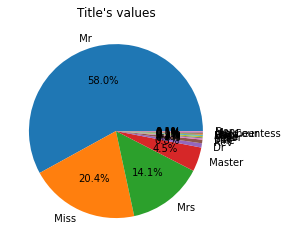

In [30]:
plt.pie(train_file['Title'].value_counts(), labels=train_file['Title'].value_counts().index, autopct="%1.1f%%")
plt.title("Title's values")

In [31]:
train_file['Title'].value_counts()

 Mr              515
 Miss            181
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Mme               1
 Lady              1
 Sir               1
 Capt              1
 Jonkheer          1
 the Countess      1
 Ms                1
 Don               1
Name: Title, dtype: int64

Text(0.5, 1.0, 'Survived by Title')

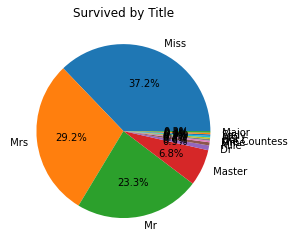

In [32]:
survived = train_file[train_file['Survived'] == 1]
plt.pie(survived['Title'].value_counts(), labels=survived['Title'].value_counts().index, autopct="%1.1f%%")
plt.title("Survived by Title")

#more than 66% of the survivores had a "miss" or "mrs" title (female title)
#more than 30% of the survivores had a "mr" or "master" title (male title)

In [33]:
'''
 Mr              515
 Miss            181
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Ms                1
 Sir               1
 Don               1
 Capt              1
 the Countess      1
 Mme               1
 Jonkheer          1
 Lady              1
'''

train_file['Title'].replace([' Dr', ' Rev', ' Major', ' Mlle', ' Col', ' Ms', ' Sir',
                    ' Don', ' Capt', ' the Countess', ' Mme', ' Jonkheer', ' Lady'], ' Others', inplace=True)

#test data
test_file['Title'].replace([' Dr', ' Rev', ' Major', ' Mlle', ' Col', ' Ms', ' Sir',
                    ' Don', ' Capt', ' the Countess', ' Mme', ' Jonkheer', ' Lady'], ' Others', inplace=True)

Text(0.5, 1.0, "Title's values")

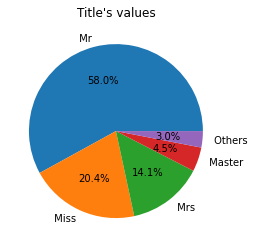

In [34]:
plt.pie(train_file['Title'].value_counts(), labels=train_file['Title'].value_counts().index, autopct="%1.1f%%")
plt.title("Title's values")

In [35]:
train_file.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,isAlone,Title
0,0,3,1,22.0,-0.566959,S,0,0,0,0,0,0,0,0,1,0,Mr
1,1,1,0,38.0,0.989016,C,0,0,1,0,0,0,0,0,0,0,Mrs
2,1,3,0,26.0,-0.550557,S,0,0,0,0,0,0,0,0,1,1,Miss
3,1,1,0,35.0,0.547171,S,0,0,1,0,0,0,0,0,0,0,Mrs
4,0,3,1,35.0,-0.547519,S,0,0,0,0,0,0,0,0,1,1,Mr
5,0,3,1,NaN,-0.537598,Q,0,0,0,0,0,0,0,0,1,1,Mr
6,0,1,1,54.0,0.517101,S,0,0,0,0,1,0,0,0,0,1,Mr
7,0,3,1,2.0,-0.231019,S,0,0,0,0,0,0,0,0,1,0,Master
8,1,3,0,27.0,-0.472597,S,0,0,0,0,0,0,0,0,1,0,Mrs
9,1,2,0,14.0,-0.012426,C,0,0,0,0,0,0,0,0,1,0,Mrs


In [36]:
#lets check to see if we find some nan values

train_file.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_T       0
Cabin_U       0
isAlone       0
Title         0
dtype: int64

In [37]:
mode = train_file['Embarked'].mode()[0]

train_file['Embarked'].fillna(mode, inplace=True)

#test data
mode_test = test_file['Embarked'].mode()[0]

test_file['Embarked'].fillna(mode_test, inplace=True)

In [38]:
train_file.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_T       0
Cabin_U       0
isAlone       0
Title         0
dtype: int64

In [39]:
man = train_file[train_file['Sex'] == 1]
man_median = man['Age'].median()

woman = train_file[train_file['Sex'] == 0]
woman_median = woman['Age'].median()

np.where(train_file['Sex'] == 1,
         train_file['Age'].fillna(man_median, inplace=True),
         train_file['Age'].fillna(woman_median, inplace=True))

#test data
man_test = test_file[test_file['Sex'] == 1]
man_median_test = man_test['Age'].median()

woman_test = test_file[test_file['Sex'] == 0]
woman_median_test = woman_test['Age'].median()

np.where(test_file['Sex'] == 1,
         test_file['Age'].fillna(man_median_test, inplace=True),
         test_file['Age'].fillna(woman_median_test, inplace=True))

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, No

In [40]:
train_file.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Cabin_A     0
Cabin_B     0
Cabin_C     0
Cabin_D     0
Cabin_E     0
Cabin_F     0
Cabin_G     0
Cabin_T     0
Cabin_U     0
isAlone     0
Title       0
dtype: int64

In [41]:
train_file.describe()

,Survived,Pclass,Sex,Age,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,isAlone
count,888.000000,888.000000,888.000000,888.000000,8.880000e+02,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,0.647523,29.540732,6.801366e-17,0.016892,0.050676,0.066441,0.037162,0.036036,0.014640,0.004505,0.001126,0.772523,0.602477
std,0.486091,0.834007,0.478011,13.022614,1.000564e+00,0.128939,0.219458,0.249193,0.189266,0.186485,0.120173,0.067002,0.033558,0.419440,0.489661
min,0.000000,1.000000,0.000000,0.420000,-7.431301e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,-5.512664e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,3.000000,1.000000,29.000000,-3.919008e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,4.609266e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,5.647628e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
train_file.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Fare        float64
Embarked     object
Cabin_A       uint8
Cabin_B       uint8
Cabin_C       uint8
Cabin_D       uint8
Cabin_E       uint8
Cabin_F       uint8
Cabin_G       uint8
Cabin_T       uint8
Cabin_U       uint8
isAlone       int64
Title        object
dtype: object

In [43]:
#title dummies

title_dummies = pd.get_dummies(train_file['Title'], prefix='Title')
train_file = pd.concat([train_file, title_dummies], axis=1)
train_file.drop(columns=['Title'], inplace=True)
train_file.head(10)

#test data
title_dummies_test = pd.get_dummies(test_file['Title'], prefix='Title')
test_file = pd.concat([test_file, title_dummies_test], axis=1)
test_file.drop(columns=['Title'], inplace=True)
test_file.head(10)

,Pclass,Sex,Age,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,isAlone,Title_ Dona,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Others
0,3,1,34.5,-0.524907,Q,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,3,0,47.0,-0.541238,S,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,2,1,62.0,-0.488308,Q,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,3,1,27.0,-0.508496,S,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
4,3,0,22.0,-0.437102,S,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5,3,1,14.0,-0.497417,S,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
6,3,0,30.0,-0.528846,Q,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
7,2,1,26.0,-0.107953,S,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8,3,0,18.0,-0.536724,C,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
9,3,1,21.0,-0.203472,S,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [44]:
#embarked dummies

title_dummies = pd.get_dummies(train_file['Embarked'], prefix='Embarked')
train_file = pd.concat([train_file, title_dummies], axis=1)
train_file.drop(columns=['Embarked'], inplace=True)
train_file.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Cabin_U,isAlone,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Others,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,-0.566959,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,1,1,0,38.0,0.989016,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,3,0,26.0,-0.550557,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
3,1,1,0,35.0,0.547171,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,3,1,35.0,-0.547519,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
5,0,3,1,29.0,-0.537598,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
6,0,1,1,54.0,0.517101,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
7,0,3,1,2.0,-0.231019,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
8,1,3,0,27.0,-0.472597,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
9,1,2,0,14.0,-0.012426,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [45]:
train_file.dtypes

Survived           int64
Pclass             int64
Sex                int64
Age              float64
Fare             float64
Cabin_A            uint8
Cabin_B            uint8
Cabin_C            uint8
Cabin_D            uint8
Cabin_E            uint8
Cabin_F            uint8
Cabin_G            uint8
Cabin_T            uint8
Cabin_U            uint8
isAlone            int64
Title_ Master      uint8
Title_ Miss        uint8
Title_ Mr          uint8
Title_ Mrs         uint8
Title_ Others      uint8
Embarked_C         uint8
Embarked_Q         uint8
Embarked_S         uint8
dtype: object

In [46]:
train_file.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
Fare             0
Cabin_A          0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_T          0
Cabin_U          0
isAlone          0
Title_ Master    0
Title_ Miss      0
Title_ Mr        0
Title_ Mrs       0
Title_ Others    0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

X = train_file.drop(columns=['Survived'])
y = train_file['Survived']
accuracies = []
models = []
columns = ['Accuracy', 'Model']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=19)

X.head(10)

,Pclass,Sex,Age,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,...,Cabin_U,isAlone,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Others,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,-0.566959,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,1,0,38.0,0.989016,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,3,0,26.0,-0.550557,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
3,1,0,35.0,0.547171,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,3,1,35.0,-0.547519,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
5,3,1,29.0,-0.537598,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
6,1,1,54.0,0.517101,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
7,3,1,2.0,-0.231019,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
8,3,0,27.0,-0.472597,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
9,2,0,14.0,-0.012426,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [70, 80, 90, 100, 110],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [4, 6, 8, 10, 12],
    'warm_start': [True, False],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

rf = RandomForestClassifier(random_state = 19)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 4, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

accuracies.append(grid_search.best_score_)
models.append("Random Forest")

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'degree': [1, 2, 3],
    'kernel': ['linear', 'poly', 'rbf']
}

svc = SVC(random_state=19)

grid_svc = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

grid_svc.fit(X, y)

accuracies.append(grid_svc.best_score_)
models.append("SVC")

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [70, 80, 90, 100, 110],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10]
}

tree = DecisionTreeClassifier(random_state=19)

grid_tree = GridSearchCV(estimator = tree, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

grid_tree.fit(X, y)

accuracies.append(grid_tree.best_score_)
models.append("Decision Tree")

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7]
}

knn = KNeighborsClassifier()

grid_knn = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

grid_knn.fit(X, y)

accuracies.append(grid_knn.best_score_)
models.append("K Neighbors")

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [70, 80, 90, 100, 110],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

xgb = XGBClassifier()

grid_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid,
                        cv = 4, n_jobs = -1, verbose = 2)

grid_xgb.fit(X, y)
accuracies.append(grid_xgb.best_score_)
models.append("XGBoost")

Fitting 4 folds for each of 30 candidates, totalling 120 fits


KeyboardInterrupt: 

In [ ]:
data = pd.DataFrame("Model": models
                    "Accuracy": accuracies)

pivot_table = pd.pivot_table(data, index="Model")
pivot_table